In [15]:
#IMPORTS

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import librosa.display

import IPython.display as ipd

from google.cloud import storage

storage_client = storage.Client()

bucket = storage_client.get_bucket('genredataset')


import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


import keras
from keras import models
from keras import layers
from keras.layers import Activation, Dense

import warnings
warnings.filterwarnings('ignore')






In [16]:
#READING FROM CSV, MAKING DATA INTO MATRIX

#CHANGE THIS FOR GOOG CLOUD

path = "gs://genredataset/data.csv"

data = pd.read_csv(path)
data.head()
data.shape
data = data.drop(['filename'], axis = 1)

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:,:-1], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_test)

len(y_train)
len(y_test)
X_train[10]


[[-1.7586195  -1.5431288  -0.71909268 ... -1.55829603 -1.23916603
  -0.16506405]
 [-0.17049837 -0.58278603  1.04816912 ... -0.29968054 -0.48365346
  -0.75604379]
 [ 1.78430866  1.32015905  1.08763981 ...  1.07249568 -0.78765531
   2.06570881]
 ...
 [ 0.37159489  0.43458061  2.19151821 ... -0.22066794 -0.14398713
   0.89298911]
 [ 0.64833342  0.2484704  -0.68564224 ... -0.82617331 -0.32535777
  -0.0930287 ]
 [ 0.64299343  0.74998576  0.36950387 ...  1.04207483  0.27650858
  -0.53488851]]


array([ 3.48869699,  3.35177625,  3.11989239,  1.14305732,  1.9392381 ,
        3.74484569,  1.86168361, -1.98479551,  0.04443675, -1.90639277,
        0.83002903, -0.93707218,  0.82923402, -0.81174163,  1.60378703,
       -0.74318155,  0.80014627, -0.72417479,  1.04140363,  0.22652562,
        0.87360545, -0.75701588, -0.03750974, -0.69889571, -0.2673468 ,
       -0.19761635])

In [17]:
#BUILDING THE NEURAL NETWORK


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=20,batch_size=128)

test_lostt, test_acc = model.evaluate(X_test,y_test)

print('test_acc: ', test_acc)


print("got here")



Epoch 1/20
800/800 [==============================] - 0s 477us/step - loss: 2.2062 - acc: 0.2200
Epoch 2/20
800/800 [==============================] - 0s 37us/step - loss: 1.9078 - acc: 0.3450
Epoch 3/20
800/800 [==============================] - 0s 34us/step - loss: 1.6648 - acc: 0.4088
Epoch 4/20
800/800 [==============================] - 0s 51us/step - loss: 1.4584 - acc: 0.4938
Epoch 5/20
800/800 [==============================] - 0s 56us/step - loss: 1.3037 - acc: 0.5550
Epoch 6/20
800/800 [==============================] - 0s 58us/step - loss: 1.1732 - acc: 0.6163
Epoch 7/20
800/800 [==============================] - 0s 44us/step - loss: 1.0764 - acc: 0.6425
Epoch 8/20
800/800 [==============================] - 0s 52us/step - loss: 0.9981 - acc: 0.6875
Epoch 9/20
800/800 [==============================] - 0s 43us/step - loss: 0.9269 - acc: 0.7050
Epoch 10/20
800/800 [==============================] - 0s 65us/step - loss: 0.8685 - acc: 0.7362
Epoch 11/20
800/800 [=================

In [18]:
#TRAINING THE MODEL ON A SUBSET OF THE MATRIX

x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)


print(results)


print(f'the model is {results[1]*100}% accurate!')

model.summary()


Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 1s 1ms/step - loss: 2.3105 - acc: 0.1000 - val_loss: 2.1474 - val_acc: 0.3600
Epoch 2/30
600/600 [==============================] - 0s 54us/step - loss: 2.1182 - acc: 0.3583 - val_loss: 2.0089 - val_acc: 0.3300
Epoch 3/30
600/600 [==============================] - 0s 87us/step - loss: 1.9688 - acc: 0.3683 - val_loss: 1.8801 - val_acc: 0.3150
Epoch 4/30
600/600 [==============================] - 0s 305us/step - loss: 1.8224 - acc: 0.3583 - val_loss: 1.7682 - val_acc: 0.3300
Epoch 5/30
600/600 [==============================] - 0s 306us/step - loss: 1.6947 - acc: 0.3800 - val_loss: 1.6712 - val_acc: 0.3700
Epoch 6/30
600/600 [==============================] - 0s 90us/step - loss: 1.5848 - acc: 0.4317 - val_loss: 1.5799 - val_acc: 0.4250
Epoch 7/30
600/600 [==============================] - 0s 93us/step - loss: 1.4882 - acc: 0.4800 - val_loss: 1.5031 - val_acc: 0.4450
Epoch 8/30
600/600 [==

In [19]:
#PREDICTING FOR TEST DATA


predictions = model.predict(X_test)

print(predictions)

predictions[0].shape

print(predictions[0].shape)


print(np.sum(predictions[0]))


print(np.argmax(predictions[0]))


print("got here 2222")

[[1.14508171e-03 3.29473708e-03 2.23084376e-03 ... 1.46075604e-06
  6.95780400e-05 2.78048592e-05]
 [1.12687623e-04 3.88740969e-04 9.49887708e-02 ... 3.89445484e-01
  3.20841409e-02 8.95699188e-02]
 [2.08963858e-04 2.56720209e-12 1.15118015e-09 ... 8.57266480e-10
  7.04962799e-09 5.42851603e-06]
 ...
 [1.27275649e-04 1.39181051e-04 1.14887860e-02 ... 5.70749268e-02
  4.94477488e-02 2.72324026e-01]
 [1.03017932e-03 3.47642275e-03 1.18078284e-01 ... 1.42590657e-01
  4.64566462e-02 1.91615596e-01]
 [4.62067164e-02 6.71901626e-06 4.42229764e-04 ... 8.74303587e-05
  1.23767462e-02 2.55449209e-02]]
(10,)
0.99999994
5
got here 2222


[-0.09904204 -0.10693491 -0.1632567  ... -0.17493577 -0.19334936
 -0.15560918]


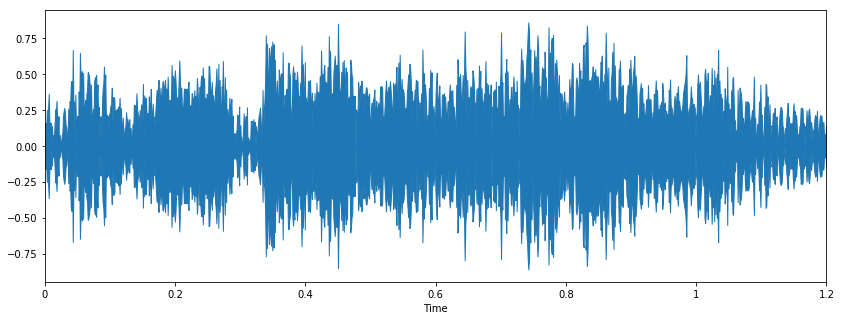

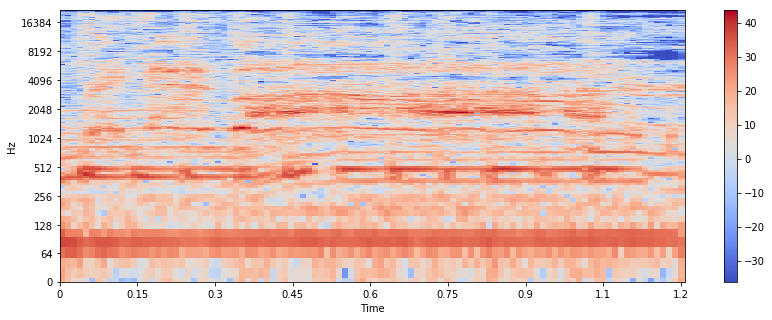

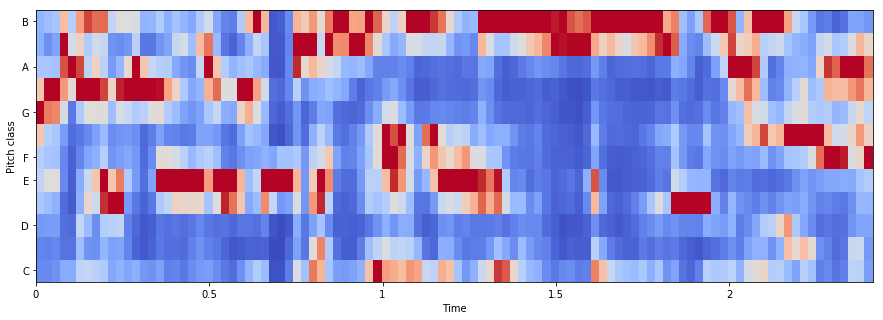

In [28]:
#TEST FILE PIPELINE

#VISUALIZING DATA


path_of_audio = 'test_audio/fbored.wav'
x , sr = librosa.load(path_of_audio, sr=None)
x, fs = librosa.load(path_of_audio)
print(x)

#WAVEFORM
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#SPECTROGRAPH
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

#CHROMOGRAM
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')






#AUDIO FILE
ipd.Audio(path_of_audio)





[ 1.62263365e-16  4.76114874e-16  5.01735405e-17  7.57940719e-17
  2.98906199e-17 -7.75021073e-16 -2.22044605e-16  3.50147262e-16
  8.60689725e-17  4.69709741e-17 -1.06752214e-18 -1.53055987e-16
  2.72268186e-16  3.02108765e-16  2.26314693e-16  1.11022302e-16
 -4.18468679e-16 -1.42514206e-16 -2.81825845e-16  0.00000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


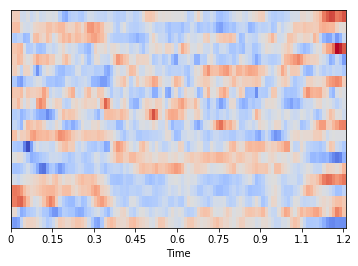

In [29]:
#MFCCS - Mel Frequency Cepstral Coefficients
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

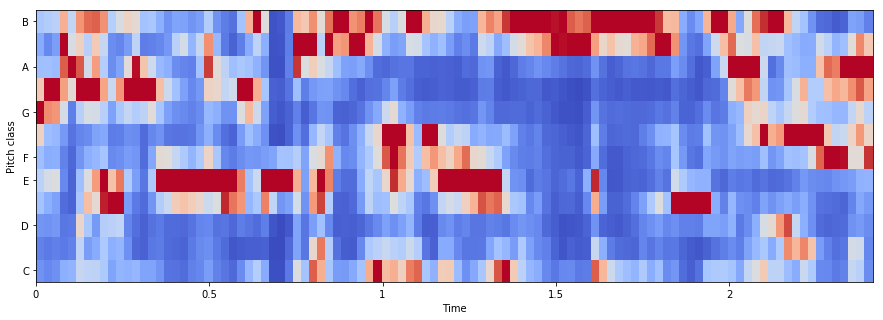

In [31]:
#CHROMA FEATURES

x, sr = librosa.load(path_of_audio)

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [21]:
#TURN WAV FILE INTO CSV DATA 
#TURN CSV DATA INTO MATRIX

csv_path = 'test_audio/file_data.csv'
music_file = 'file_data.csv'


songname = path_of_audio

y, sr = librosa.load(songname, mono=True, duration=30)

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rmse = librosa.feature.rmse(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

#PUTS HEADERS INTO THE CSV FILE
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

file = open(csv_path, 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
file.close()
    
#PUTS DATA FROM FILE INTO THE CSV FILE
to_append = f'{csv_path} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

for e in mfcc:
    to_append += f' {np.mean(e)}'
to_append += ' unknown'
file = open(csv_path, 'a', newline='')    

    
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())
    

    
#print(file)




In [22]:
#TURN CSV FILE INTO MODEL PARSEABLE MATRIX

data = pd.read_csv(csv_path)

data.head()
print(data.shape)
data = data.drop(['filename'], axis = 1)
print(data.shape)
X = scaler.fit_transform(np.array(data.iloc[:,:-1], dtype = float))
print(X.shape)

predictions = model.predict(X)
predictions[0].shape

print(predictions[0].shape)


print(np.sum(predictions[0]))

gen = np.argmax(predictions[0])
print(gen)


genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

print (f'the genre is {genres[gen]}')

os.remove(csv_path)






(1, 28)
(1, 27)
(1, 26)
(10,)
1.0
8
the genre is reggae
